<a href="https://colab.research.google.com/github/Apeksha86/Assessment/blob/main/EdubridgeQ4Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Print the first 5 rows of the dataframe.

data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           142.0          0.000           0.000                 0.007   
1           122.0          0.000           0.000                 0.006   
2           129.0          0.005           0.003                 0.001   
3           136.0          0.006           0.000                 0.008   
4           144.0          0.000           0.000                 0.006   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.002                   0.0                       0.0   
2                0.000                   0.0                       0.0   
3                0.000                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             58.0                                   0.4   
1                             27.0                                   1.4   
2                             34.0                                   1.7   
3                             45.0                                   0.8   
4                             32.0                                   1.0   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                9.0       ...          136.0   
1                                                4.0       ...           91.0   
2                                                0.0       ...           78.0   
3                                                2.0       ...          129.0   
4                                                0.0       ...          122.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          156.0                        0.0                         0.0   
1          144.0                        4.0                         0.0   
2          196.0                       10.0                         0.0   
3          158.0                        2.0                         0.0   
4          160.0                        1.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           148.0           147.0             149.0                 1.0   
1           126.0           120.0             122.0                 6.0   
2           137.0           136.0             137.0                 6.0   
3           144.0           143.0             145.0                 1.0   
4           150.0           147.0             149.0                 2.0   

   histogram_tendency  fetal_health  
0                 0.0           1.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 0.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [ ]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [ ]:
# Analyse statically insight of data
data.describe().T

count        mean  \
baseline value                                      1700.0  133.213529   
accelerations                                       1700.0    0.003212   
fetal_movement                                      1700.0    0.010211   
uterine_contractions                                1700.0    0.004356   
light_decelerations                                 1700.0    0.001899   
severe_decelerations                                1700.0    0.000004   
prolongued_decelerations                            1700.0    0.000158   
abnormal_short_term_variability                     1700.0   46.508824   
mean_value_of_short_term_variability                1700.0    1.345353   
percentage_of_time_with_abnormal_long_term_vari...  1700.0    9.738235   
mean_value_of_long_term_variability                 1700.0    8.252412   
histogram_width                                     1700.0   70.721176   
histogram_min                                       1700.0   93.121176   
histogram_max                                       1700.0  163.842353   
histogram_number_of_peaks                           1700.0    4.088824   
histogram_number_of_zeroes                          1700.0    0.324118   
histogram_mode                                      1700.0  137.128235   
histogram_mean                                      1700.0  134.461176   
histogram_median                                    1700.0  137.862941   
histogram_variance                                  1700.0   19.046471   
histogram_tendency                                  1700.0    0.324706   
fetal_health                                        1700.0    1.304706   

                                                          std    min      25%  \
baseline value                                       9.873344  106.0  126.000   
accelerations                                        0.003888    0.0    0.000   
fetal_movement                                       0.050124    0.0    0.000   
uterine_contractions                                 0.002943    0.0    0.002   
light_decelerations                                  0.002976    0.0    0.000   
severe_decelerations                                 0.000059    0.0    0.000   
prolongued_decelerations                             0.000587    0.0    0.000   
abnormal_short_term_variability                     17.276801   12.0   32.000   
mean_value_of_short_term_variability                 0.898037    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.227303    0.0    0.000   
mean_value_of_long_term_variability                  5.716710    0.0    4.600   
histogram_width                                     38.668555    3.0   37.000   
histogram_min                                       29.520766   50.0   67.000   
histogram_max                                       17.651851  122.0  152.000   
histogram_number_of_peaks                            2.927774    0.0    2.000   
histogram_number_of_zeroes                           0.683795    0.0    0.000   
histogram_mode                                      16.608926   60.0  129.000   
histogram_mean                                      15.616890   75.0  125.000   
histogram_median                                    14.552801   77.0  128.000   
histogram_variance                                  29.575447    0.0    2.000   
histogram_tendency                                   0.608340   -1.0    0.000   
fetal_health                                         0.614788    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  159.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.006    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
print(f"The dataset size: {data.shape}")

The dataset size: (1700, 22)


In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


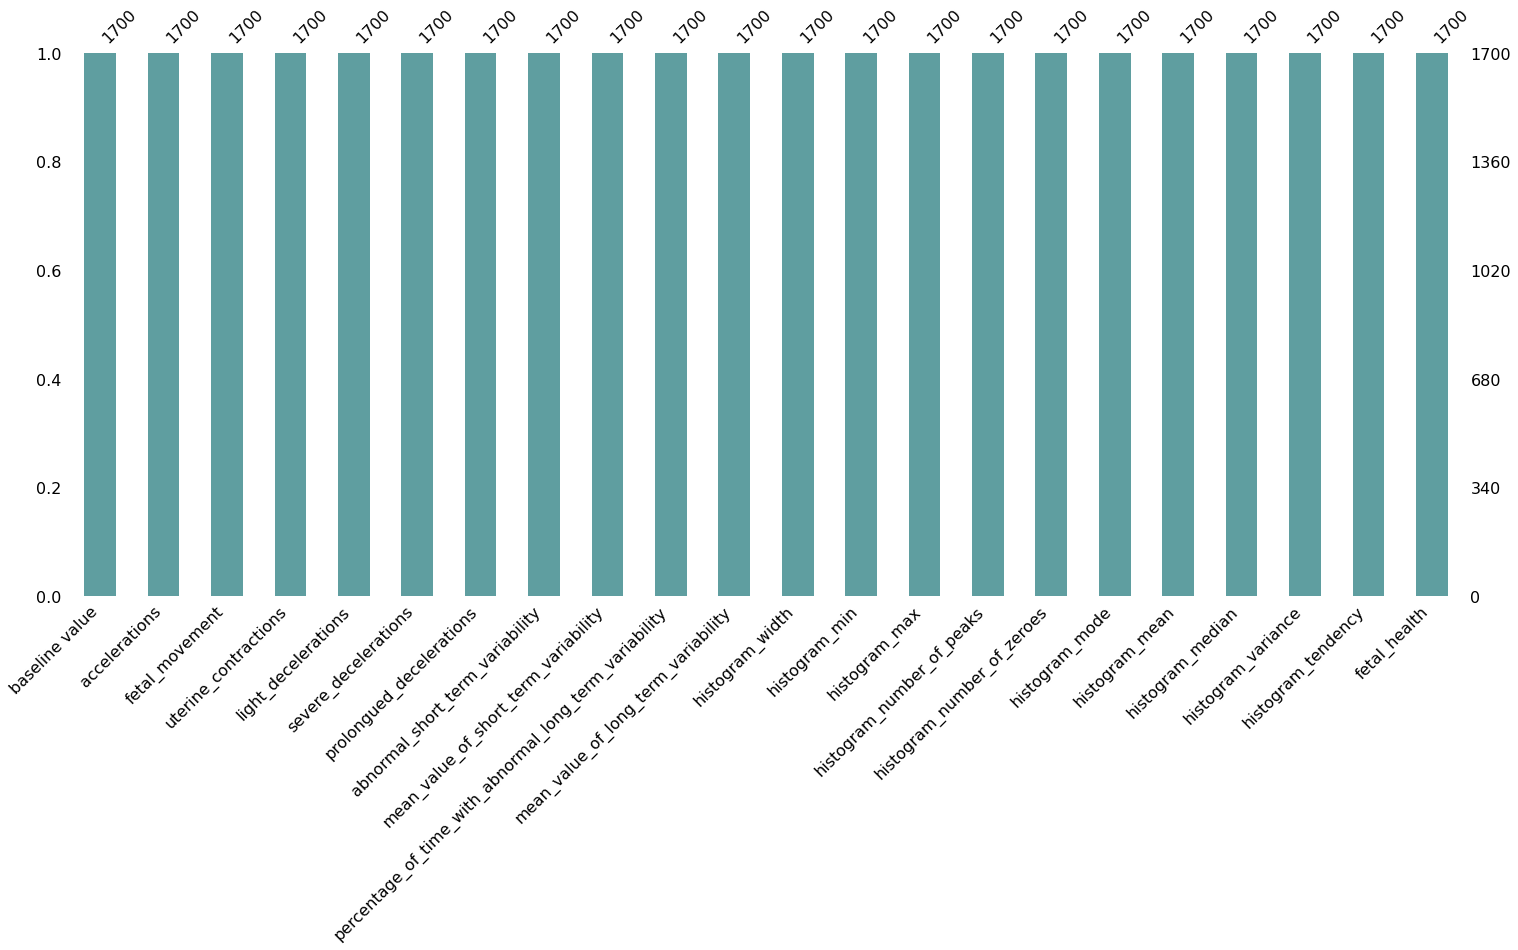

In [ ]:
# Null count analysis
null_plot = msno.bar(data, color = "#5F9EA0")

In [ ]:
data["fetal_health"].describe()

count    1700.000000
mean        1.304706
std         0.614788
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

1.0    1323
2.0     236
3.0     141
Name: fetal_health, dtype: int64


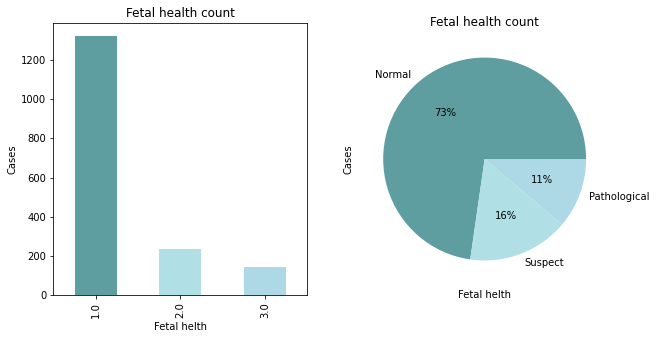

In [ ]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

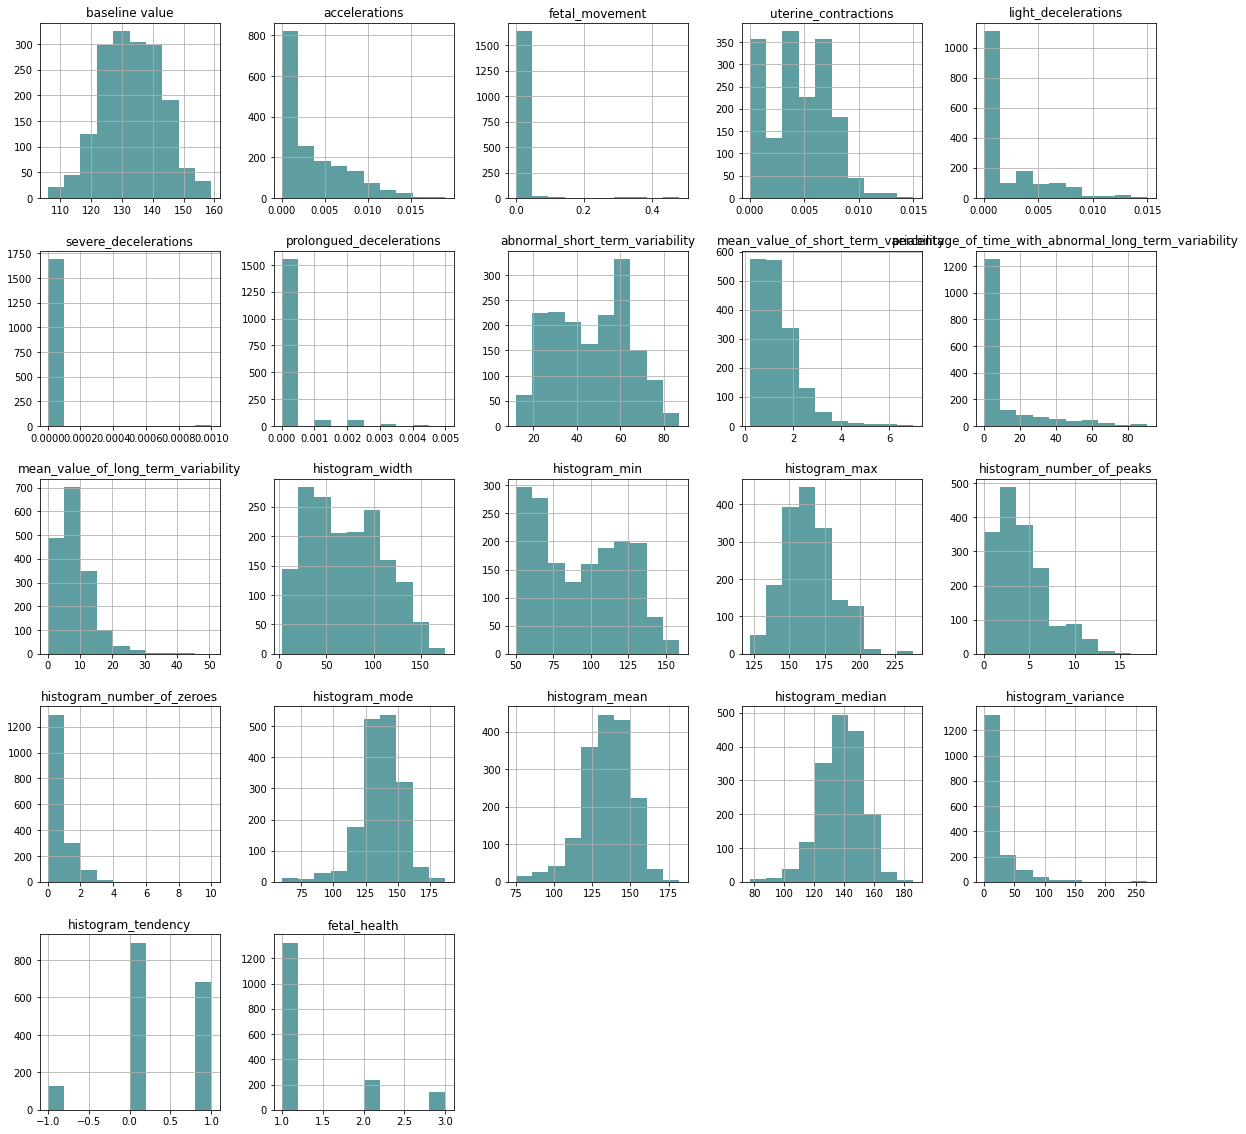

In [ ]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

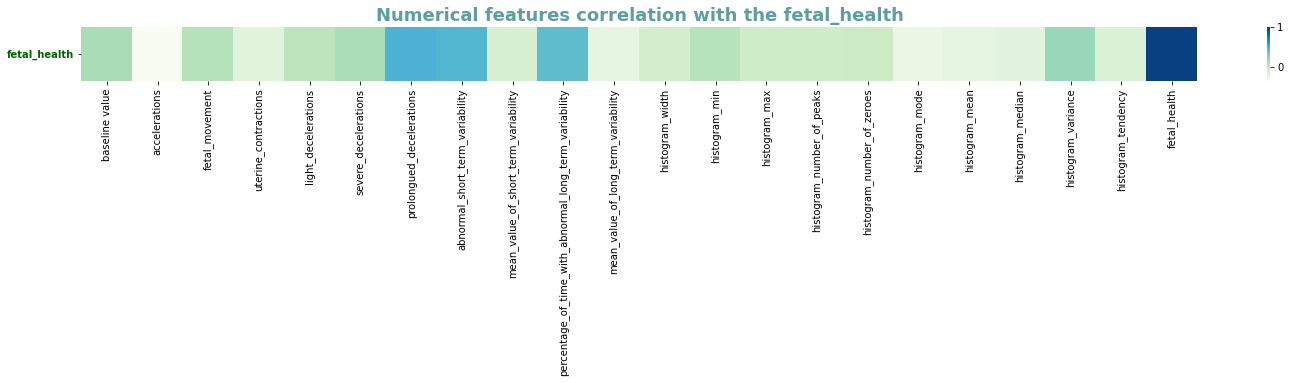

In [ ]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [ ]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

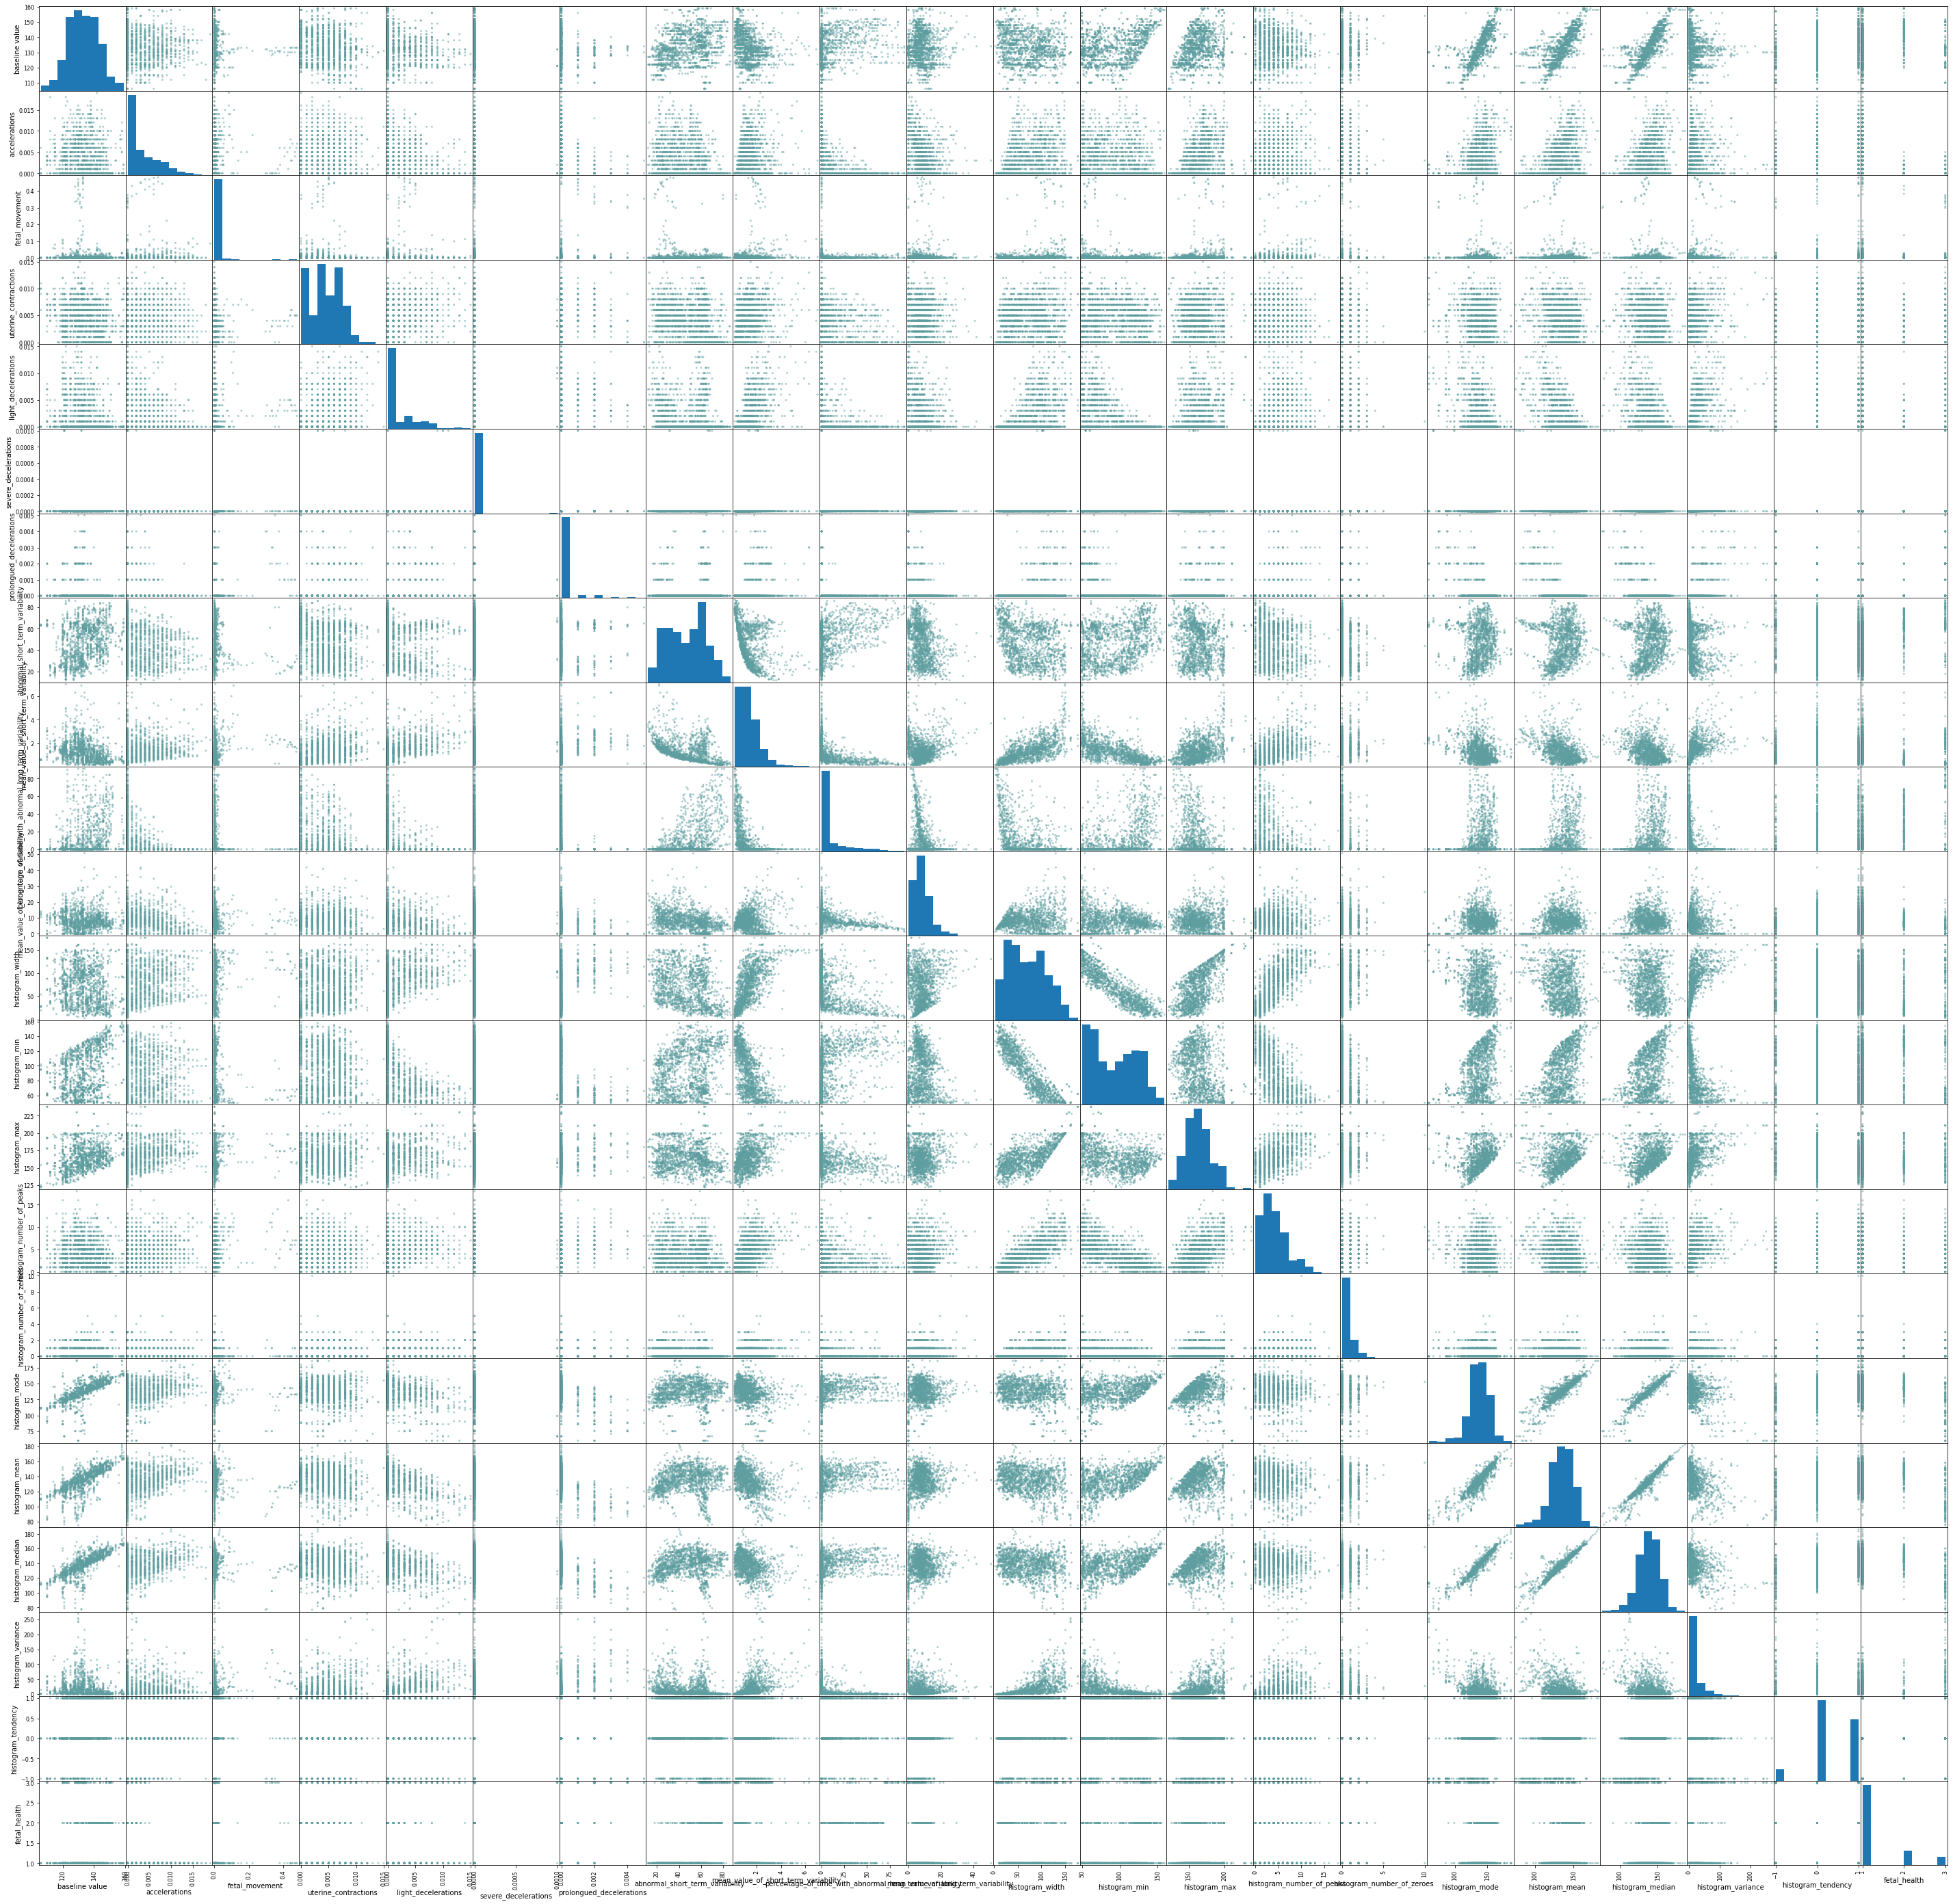

In [ ]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(data,figsize=(50, 50), color = "#5F9EA0")

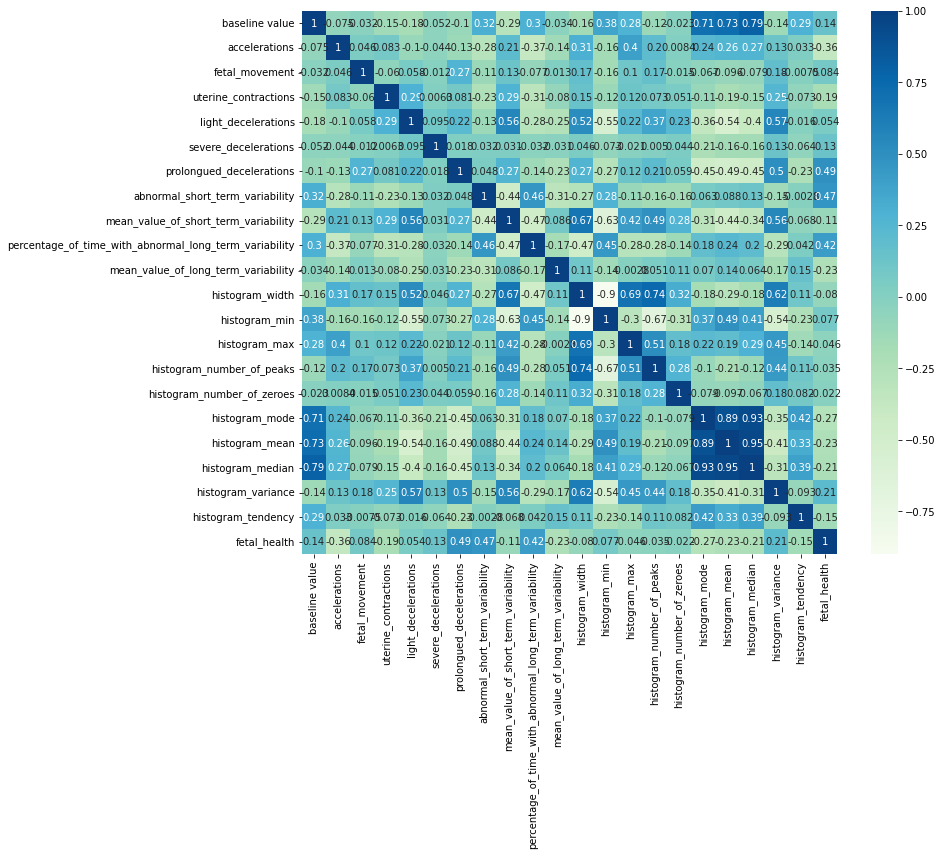

In [ ]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")

In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
X.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0        0.890180      -0.826476       -0.203779              0.898614   
1       -1.136072      -0.826476       -0.203779              0.558684   
2       -0.426884       0.459927       -0.143909             -1.140964   
3        0.282305       0.717208       -0.203779              1.238543   
4        1.092805      -0.826476       -0.203779              0.558684   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638421             -0.059514                 -0.268568   
1             0.033809             -0.059514                 -0.268568   
2            -0.638421             -0.059514                 -0.268568   
3            -0.638421             -0.059514                 -0.268568   
4            -0.638421             -0.059514                 -0.268568   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         0.665317                             -1.052998   
1                        -1.129524                              0.060870   
2                        -0.724237                              0.395030   
3                        -0.087358                             -0.607451   
4                        -0.840034                             -0.384677   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                          -0.040514       ...   
1                                          -0.314908       ...   
2                                          -0.534424       ...   
3                                          -0.424666       ...   
4                                          -0.534424       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -1.312076       1.452924      -0.444410                  -1.396975   
1        -0.458419      -0.071875      -1.124426                  -0.030347   
2         1.223028      -0.512372       1.822308                   2.019595   
3        -1.079261       1.215733      -0.331074                  -0.713661   
4        -0.846445       0.978542      -0.217738                  -1.055318   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.474138        0.654766        0.803138   
1                   -0.474138       -0.670213       -0.926268   
2                   -0.474138       -0.007723        0.098565   
3                   -0.474138        0.413861        0.546929   
4                   -0.474138        0.775219        0.803138   

   histogram_median  histogram_variance  histogram_tendency  
0          0.765511           -0.610364           -0.533914  
1         -1.090347           -0.441255           -0.533914  
2         -0.059315           -0.441255           -0.533914  
3          0.490569           -0.610364           -0.533914  
4          0.765511           -0.576542            1.110386  

[5 rows x 21 columns]

In [ ]:
y = data["fetal_health"]

In [ ]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1190, 21), (510, 21), (1190,), (510,))

In [ ]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.902


In [ ]:
cv_method = StratifiedKFold(n_splits=3, shuffle=True,
                            random_state=42
                            )

In [ ]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.85390428 0.8790932  0.88888889]
CrossValMeans: 0.874
CrossValStandard Deviation: 0.015


In [ ]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [ ]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [ ]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=100)


In [ ]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 100, 'intercept_scaling': 1, 'tol': 0.0001}


In [ ]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.878


In [ ]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [ ]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.122
Root Mean Square Error for Logistic Regression = 0.349
R^2(coefficient of determination) on training set = 0.897
R^2(coefficient of determination) on testing set = 0.902


In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       397
         2.0       0.69      0.63      0.66        71
         3.0       0.84      0.74      0.78        42

    accuracy                           0.90       510
   macro avg       0.82      0.78      0.80       510
weighted avg       0.90      0.90      0.90       510



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[384  12   1]
 [ 21  45   5]
 [  3   8  31]]


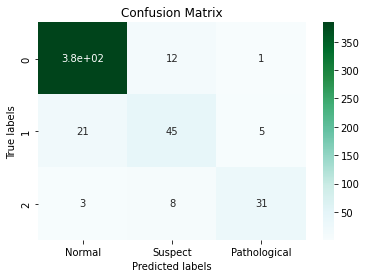

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);